For this project I am going to focus on the question 1 which is: which "kinds" of players are most likely to contribute a large amount of data. I will use the data from players.csv and sessions.csv to figure it out.


In [1]:
set.seed(2020)
library(readr)
library(lubridate)
library(ggplot2)
library(dplyr)

players <- read.csv("players.csv")
sessions <- read.csv("sessions.csv")

cat("Players dataset:", nrow(players), "rows,", ncol(players), "columns\n")
cat("Sessions dataset:", nrow(sessions), "rows,", ncol(sessions), "columns\n")

head(players)
head(sessions)

str(players)
str(sessions)



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Players dataset: 196 rows, 7 columns
Sessions dataset: 1535 rows, 5 columns


,experience,subscribe,hashedEmail,played_hours,name,gender,Age
,<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>
1,Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
2,Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
3,Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
4,Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
5,Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
6,Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


,hashedEmail,start_time,end_time,original_start_time,original_end_time
,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
2,36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
3,f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
4,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
5,36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
6,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


'data.frame':	196 obs. of  7 variables:
 $ experience  : chr  "Pro" "Veteran" "Veteran" "Amateur" ...
 $ subscribe   : logi  TRUE TRUE FALSE TRUE TRUE TRUE ...
 $ hashedEmail : chr  "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d" "f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9" "b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28" "23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5" ...
 $ played_hours: num  30.3 3.8 0 0.7 0.1 0 0 0 0.1 0 ...
 $ name        : chr  "Morgan" "Christian" "Blake" "Flora" ...
 $ gender      : chr  "Male" "Male" "Male" "Female" ...
 $ Age         : int  9 17 17 21 21 17 19 21 47 22 ...
'data.frame':	1535 obs. of  5 variables:
 $ hashedEmail        : chr  "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf" "36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686" "f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc" "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f

In this project, I will use two datasets — players.csv and sessions.csv — which together describe user demographics and their in-game activity logs. The datasets are linked through the variable hashedEmail, which acts as a unique player identifier.

Here is the data dor their type and description.

| Dataset        | Observations | Variables | Description                                                     |
| -------------- | ------------ | --------- | --------------------------------------------------------------- |
| `players.csv`  | 196          | 7         | Contains demographic and experience information for each player |
| `sessions.csv` | 1535         | 5         | Contains detailed time records of each player’s gaming sessions |

| Variable       | Type      | Description                                                                  |
| -------------- | --------- | ---------------------------------------------------------------------------- |
| `experience`   | Character | The player’s experience level (e.g., *Amateur*, *Regular*, *Pro*, *Veteran*) |
| `subscribe`    | Logical   | Whether the player has an active subscription (TRUE/FALSE)                   |
| `hashedEmail`  | Character | Anonymized unique identifier for each player, used to link across datasets   |
| `played_hours` | Numeric   | Total hours the player has played so far                                     |
| `name`         | Character | Player’s in-game name                                                        |
| `gender`       | Character | Player’s gender (*Male* or *Female*)                                         |
| `Age`          | Integer   | Player’s age (in years)                                                      |

| Variable              | Type      | Description                                                     |
| --------------------- | --------- | --------------------------------------------------------------- |
| `hashedEmail`         | Character | Both data has that as a unique identifier   |
| `start_time`          | Character | The start time of the game session |
| `end_time`            | Character | The end time of the game session                                |
| `original_start_time` | Numeric   | Unix-style timestamp representing the start of the session      |
| `original_end_time`   | Numeric   | Unix-style timestamp representing the end of the session        |


Both datasets can be merged using the hashedEmail field.

The players dataset provides demographic context, while sessions captures temporal play behavior.

The timestamps in sessions may require conversion for analysis because it is not easily to read by human.

The goal of subsequent steps is to combine and summarize these data to explore relationships between player characteristics and playing patterns.

After loading, I checked:
- The number of observations and variables.
- The types of variables (numeric, categorical, etc.).
- A quick preview of the first few rows.
- The missing data.


Here is the problem that I want to do the research about: Can a player’s age, total playtime predict whether they will subscribe to the game-related newsletter?

In [2]:

glimpse(players)
glimpse(sessions)

sessions <- sessions |>
  mutate(
    start_time = dmy_hm(start_time),
    end_time = dmy_hm(end_time),
    session_length = as.numeric(difftime(end_time, start_time, units = "hours"))
  )

players_summary <- sessions |>
  group_by(hashedEmail) |>
  summarise(
    total_play_time = sum(session_length, na.rm = TRUE),
    total_sessions = n()
  )

merged_data <- left_join(players, players_summary, by = "hashedEmail")

player_sessions <- sessions |>
  group_by(hashedEmail) |>
  summarise(
    total_play_time = sum(session_length, na.rm = TRUE),
    total_sessions = n()
  )

glimpse(merged_data)

colSums(is.na(merged_data))

sum(duplicated(merged_data$hashedEmail))

summary(merged_data)

Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <int> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…
Rows: 1,535
Columns: 5
$ hashedEmail         <chr> "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8a…
$ start_time          <chr> "30/06/2024 18:12", "17/06/2024 23:33", "25/07/202…
$ end_time            <chr> "30/06/2024 18:24", "17/06/2024 23:46", "25/07/202…
$ original_start_time <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…
$ original_end_time   <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+

experience       subscribe     hashedEmail    played_hours            name 
              0               0               0               0               0 
         gender             Age total_play_time  total_sessions 
              0               2              71              71

[1] 0

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age        total_play_time    
 Length:196         Length:196         Min.   : 9.00   Min.   :  0.08333  
 Class :character   Class :character   1st Qu.:17.00   1st Qu.:  0.18333  
 Mode  :character   Mode  :character   Median :19.00   Median :  0.53333  
                                       Mean   :21.14   Mean   : 10.39547  
                                       3r

Here is the data after cleaning:

Each player now has demographic information and their total play time and number of sessions.

Time variables are standardized.

Missing values are handled.

This cleaned dataset (merged_data) will be used in Exploratory Data Analysis (Step 4).

      Age         played_hours     total_play_time     total_sessions  
 Min.   : 9.00   Min.   :  0.000   Min.   :  0.08333   Min.   :  1.00  
 1st Qu.:17.00   1st Qu.:  0.000   1st Qu.:  0.18333   1st Qu.:  1.00  
 Median :19.00   Median :  0.100   Median :  0.53333   Median :  1.00  
 Mean   :21.14   Mean   :  5.846   Mean   : 10.39547   Mean   : 12.28  
 3rd Qu.:22.75   3rd Qu.:  0.600   3rd Qu.:  1.76667   3rd Qu.:  2.00  
 Max.   :58.00   Max.   :223.100   Max.   :244.51667   Max.   :310.00  
 NA's   :2                         NA's   :71          NA's   :71      

,Age,played_hours,total_play_time,total_sessions
Age,1.00000000,-0.08462715,-0.0848540,-0.07735862
played_hours,-0.08462715,1.00000000,0.9989405,0.76211638
total_play_time,-0.08485400,0.99894053,1.0000000,0.79039046
total_sessions,-0.07735862,0.76211638,0.7903905,1.00000000


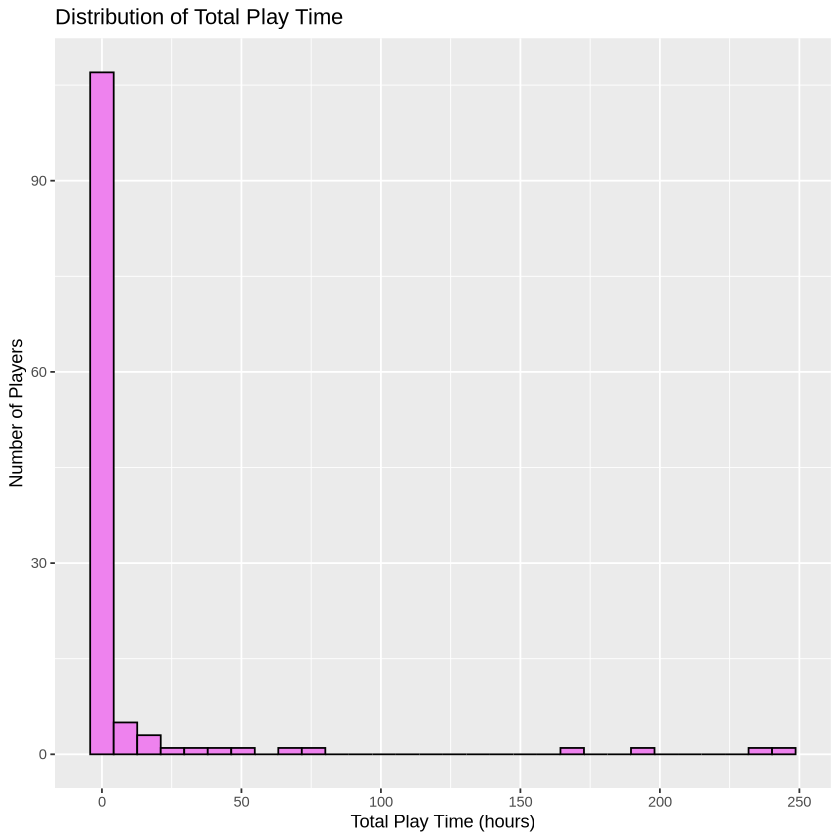

In [3]:
summary(merged_data[, c("Age", "played_hours", "total_play_time", "total_sessions")])

cor(merged_data[, c("Age", "played_hours", "total_play_time", "total_sessions")], use = "complete.obs")

ggplot(merged_data |>
  filter(!is.na(total_play_time)), aes(x = total_play_time)) +
  geom_histogram(fill = "violet", color = "black", bins = 30) +
  labs(title = "Distribution of Total Play Time",
       x = "Total Play Time (hours)",
       y = "Number of Players")


This histogram shows how does players distributed. The distribution is extremely right-skewed. Most players have very low total play time. The first bar contains the majority of players, showing that the typical user only played for a short time. A small number of players have very high play time. 

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


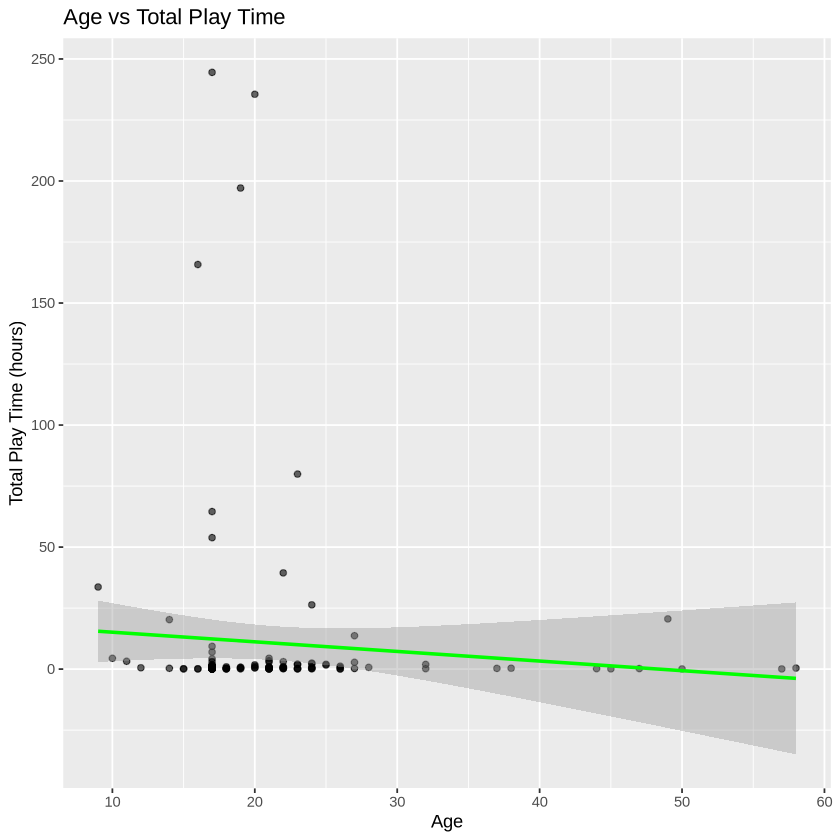

In [4]:
ggplot(merged_data |>
  filter(!is.na(total_play_time)), aes(x = Age, y = total_play_time)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", color = "green") +
  labs(title = "Age vs Total Play Time",
       x = "Age", y = "Total Play Time (hours)")

There is no strong relationship between age and total play time. The regression line is almost flat, indicating that age does not meaningfully predict how long players spend in the game. Younger players show more variation in engagement. Older players generally show low play time. 

I propose using a linear regression model to predict a player’s total play time based on their characteristics (e.g., age, total playtime from players.csv and sessions.csv). Linear regression is appropriate because the outcome is a continuous variable.

Why this method is appropriate?

* Linear regression is suitable because the target variable (total play time) is continuous.

* It is simple to implement and allows for exploratory insights into relationships between variables.

Assumptions required:

* Linearity: the relationship between predictors and total play time is approximately linear.

* Independence: observations (players) are independent.

* Normality: residuals are roughly normally distributed.

Potential limitations or weaknesses:

* Linear regression may not capture complex, non-linear relationships.

* Extreme outliers in total play time could disproportionately affect results.

* Right-skewed distribution of total play time may violate normality assumptions; transformation may be necessary.

Model comparison and selection:

* Model performance will be evaluated using R² (proportion of variance explained) and RMSE (root mean squared error).

Data processing and splitting:

* The data will first be cleaned to remove missing values and handle extreme outliers.

* I will split the data into training (70%) and testing (30%) sets.

* Cross-validation will be applied on the training set to tune the model and check for overfitting.

* Predictors may be standardized or transformed if needed to meet assumptions.